In [2]:
from numpy import *
from pylab import *
import scipy
import scipy.integrate as integrate

In [11]:
x = linspace(0,1,1025)

In [12]:
def my_fun(x):
    return abs(x-.5)

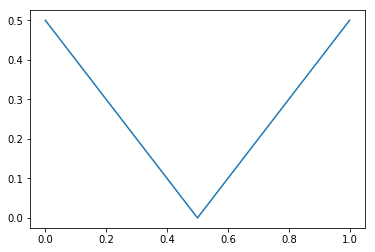

In [13]:
plot(x,my_fun(x))

In [14]:
n = 17
M = zeros((n,n))
## Hilbert matrix
for i in range(n):
    for j in range(n):
        M[i,j] = 1/(i+j+1)

In [15]:
F = array([integrate.quad(lambda x: my_fun(x)*x**i,0,1)[0] for i in range(n)]) #[1] is the error

In [16]:
c = linalg.solve(M,F)

In [17]:
p = sum([c[i]*x**i for i in range(n)],axis=0)

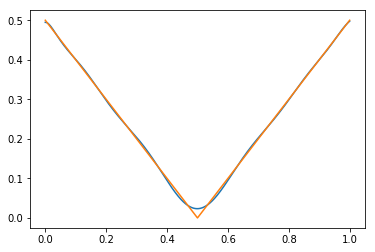

In [18]:
plot(x,p)
plot(x,my_fun(x))

In [19]:
from numpy.polynomial.legendre import leggauss
from numpy.polynomial.legendre import Legendre

In [20]:
n=50
N=2*n
q,w = leggauss(N) ## these are correct only for [-1,1]
## rescale for [0,1]
q = .5*(q+1)
w = .5*w

In [21]:
v = array([Legendre.basis(i,domain=[0,1])(x) for i in range(n)])
vq = array([Legendre.basis(i,domain=[0,1])(q) for i in range(n)])
vq.shape

(50, 100)

In [22]:
## compute the norms
norms = einsum('ij,ij,j->i',vq,vq,w)

In [23]:
## do the quadrature integral
ci = einsum('ij,j,j->i',vq,my_fun(q),w)/norms

In [24]:
p = einsum('i,ij->j',ci,v)

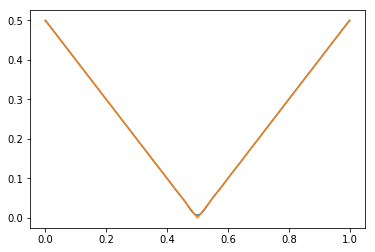

In [25]:
plot(x,p)
plot(x,my_fun(x))

In [26]:
## I compute simple integrals
#N = 100000
#x = linspace(0,1,N+1)
F=[sin,exp]
sol=[cos(0)-cos(1),e-1]
#h = 1/N;
#sol[1]

In [113]:
def lep_quad(func,down,up,N):
    res = 0.
    h = abs(up-down)/N
    x = linspace(down,up,N+1)
    func = func(x)
    for i in range(N):
        res += func[i]
    res *= h
    return res

def my_trap_quad(func,down,up,N):
    res = 0.
    h = abs(up-down)/N
    x = linspace(down,up,N+1)
    func = func(x)
    for i in range(N):
        res += (func[i+1]+func[i])
    res *= h*0.5
    #res = integrate.trapz(func,None,h)
    return res

def trap_quad(func,down,up,N):
    #res = 0.
    x = linspace(down,up,N+1)
    func = func(x)
    #for i in range(N):
     #   res += (func[i+1]+func[i])
    #res *= h*0.5
    res = integrate.trapz(func,x)
    return res

In [114]:
def error(func,sol):
    errors = zeros((2,5))
    for p in range(3,8):
        N = 10**p
        obj1 = trap_quad(func,0,1,N)
        obj2 = my_trap_quad(func,0,1,N)
        errors[0][p-3]=abs(obj1-sol)
        errors[1][p-3]=abs(obj2-sol)
    return errors

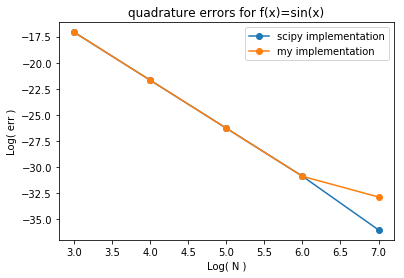

In [115]:
import matplotlib.pyplot as plt
arr=error(sin,sol[0])
plt.plot(range(3,8),log(arr[0]),marker='o',label='scipy implementation')
plt.plot(range(3,8),log(arr[1]),marker='o',label='my implementation')
plt.legend()
plt.xlabel('Log( N )')
plt.ylabel('Log( err )')
plt.title('quadrature errors for f(x)=sin(x)')
plt.show()

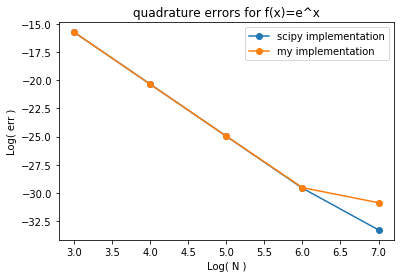

In [116]:
arr=error(exp,sol[1])
plt.plot(range(3,8),log(arr[0]),marker='o',label='scipy implementation')
plt.plot(range(3,8),log(arr[1]),marker='o',label='my implementation')
plt.legend()
plt.xlabel('Log( N )')
plt.ylabel('Log( err )')
plt.title('quadrature errors for f(x)=e^x')
plt.show()

In [165]:
x0, x1 = 0,1
trap_quad(sin,x0,x1,10**5),integrate.quad(lambda x: sin(x),x0,x1)

(0.45969769412802947, (0.45969769413186023, 5.103669643922839e-15))

In [166]:
N = 10**6
x = linspace(x0,x1,N+1)
integrand = sin(x)
h = abs(x1-x0)/N
integrate.simps(integrand,x),integrate.trapz(integrand,x)

(0.4596976941318603, 0.4596976941318219)

In [173]:
## now I try to integrate 2-dimensional function
sol2=sol[0]**2 ## this will be the exact solution
N = 10**3
x = linspace(x0,x1,N+1)
y = linspace(x0,x1,N+1)

def func(xx,yy):
    return sin(xx)*sin(yy)

integrand = func(x[:,None],y[None,:])
integrate.simps(integrate.simps(integrand,y),x),integrate.trapz(integrate.trapz(integrand,y),x),sol2

(0.21132196999015174, 0.21132193476982192, 0.21132196999014932)

In [3]:
x = linspace(0,1,1001)
func = sin(x)
h = 1/1000
Dfunc=gradient(func,x)

In [20]:
## The real derivative is a dictionary:
Dict = dict(zip(x,Dfunc))

In [22]:
Dict[1],cos(1)

(0.5407229512750518, 0.5403023058681398)